# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Traffic Sign Data

In [1]:
# Load pickled data
import pickle

training_file = "train.p"
# validation_file= "valid.p" - not using provided validation file... as greater validation accuracy is obtained by a 75/25 split
# of training dataset file, into training/validation data structures in Step 1 below.
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES

### Implementation of a Basic Summary and Visualization of type/label elements from the Training Dataset

Number of training examples = 34799
Number of classes = 43
Image Type = <class 'numpy.ndarray'>
Image Shape = (32, 32, 3)
The following output table provides one representative image from the training set file, corresponding to each Traffic Sign type
that was found in the training set file.
The title text above each image is X:Y, where X is the Traffic Sign Class label/type, & Y is the number of
occurances of that label/type that were encountered in the training set file:


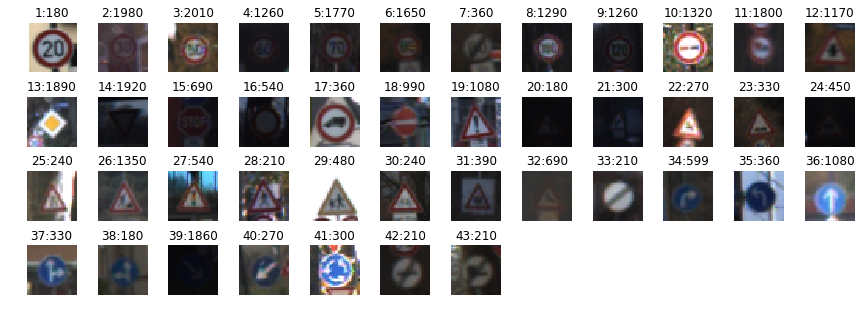

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 5))

n_train = len(X_train)
print("Number of training examples =", n_train)
maxSignTypes = 100
n_classes = 0
signClassList = []
signClassFirstOccuranceIndices = [0] * maxSignTypes
signClassCount = [0] * maxSignTypes
# Go through the training data, and create a count of the number of Traffic Sign types/labels found, and save the
# index into the training data, of the first image of each type found, so all this data can be displayed in a descriptive
# summary table.
for index in range (0, n_train):
    signType = y_train[index]
    if signType not in signClassList:
        n_classes += 1
        signClassList.append(signType)
        signClassFirstOccuranceIndices[signType] = index
    signClassCount[signType] += 1
    
print("Number of classes =", n_classes)

# Grab a sample image from the training set, and report its type and shape
image = X_train[0]
print("Image Type =", type(image))
print("Image Shape =", image.shape)

print ("The following output table provides one representative image from the training set file, corresponding to each Traffic Sign type");
print ("that was found in the training set file.")
print ("The title text above each image is X:Y, where X is the Traffic Sign Class label/type, & Y is the number of")
print ("occurances of that label/type that were encountered in the training set file:")
# Go through each entry of the lists created above, that contain data associated with each class/label/type found in the training set,
# and display the first sample image found in the training set for each class/label/type, along with a descriptive title/summary.
for index in range (0, n_classes):
    image = X_train[signClassFirstOccuranceIndices[index]]
    ax = plt.subplot(4,12,index+1)
    fig.subplots_adjust(hspace=.5)
    plt.axis('off')
    ax.set_title(str(index+1) + ":" + str(signClassCount[index]))
    plt.imshow(image)

----

## Step 2: Design and Test of the Deep Learning Model Architecture

This step provides a design and implemention of a deep learning model that learns to recognize traffic signs. The model is Trained and tested using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

To meet project specifications, during various test runs against the validation set, validation set accuracies between 0.954 and 0.961 were acheived - all of which were above the 0.93 minimum requirement for a successful project submission. 


## Preprocessing of the Provided Data

### Split Training File into two parts: Training data set & Validation data set

Split the data in the provided training set data file, into two parts:
- `Training Data -` 75% of the training set file size.
- `Validation Data -` 25% of the training set file size.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.25, random_state=0)

## Setup Scikit-Learn and TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [12]:
from sklearn.utils import shuffle
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## LeNet-5 Architecture Implementation

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify Traffic Sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.606

EPOCH 2 ...
Validation Accuracy = 0.801

EPOCH 3 ...
Validation Accuracy = 0.869

EPOCH 4 ...
Validation Accuracy = 0.893

EPOCH 5 ...
Validation Accuracy = 0.909

EPOCH 6 ...
Validation Accuracy = 0.923

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.942

EPOCH 9 ...
Validation Accuracy = 0.937

EPOCH 10 ...
Validation Accuracy = 0.943

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.866


## Set up Web-based Images Test Dataset
Set up the dataset variables with five German Traffic Signs found on the Web, and display the (32,32,3) images.

NOTE: Run the following code cells, and not the code cell above, when evaluating using the web-based images!

GermanTrafficSign1.jpg input image shape: (234, 255, 3) ; Class: 8
<class 'numpy.ndarray'>
GermanTrafficSign2.jpg input image shape: (488, 492, 3) ; Class: 27
GermanTrafficSign3.jpg input image shape: (390, 427, 3) ; Class: 13
GermanTrafficSign4.jpg input image shape: (491, 570, 3) ; Class: 14
GermanTrafficSign5.jpg input image shape: (335, 392, 3) ; Class: 19

Images re-sized to (32,32,3):


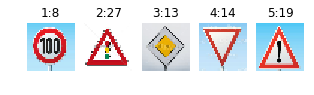

In [65]:
from skimage.io import imread
from skimage.transform import resize

X_web_test = []
y_web_test = []

# Read in the 5 sample traffic sign images taken from the web, and re-size them to (32,32,3), and classify them
im = imread("GermanTrafficSign1.jpg")
print("GermanTrafficSign1.jpg input image shape:", im.shape, "; Class: 8")
image = resize(im, (32, 32))
print(type(image))
X_web_test.append(image); y_web_test.append(7)
im = imread("GermanTrafficSign2.jpg")
print("GermanTrafficSign2.jpg input image shape:", im.shape, "; Class: 27")
image = resize(im, (32, 32))
X_web_test.append(image); y_web_test.append(26)
im = imread("GermanTrafficSign3.jpg")
print("GermanTrafficSign3.jpg input image shape:", im.shape, "; Class: 13")
image = resize(im, (32, 32))
X_web_test.append(image); y_web_test.append(12)
im = imread("GermanTrafficSign4.jpg")
print("GermanTrafficSign4.jpg input image shape:", im.shape, "; Class: 14")
image = resize(im, (32, 32))
X_web_test.append(image); y_web_test.append(13)
im = imread("GermanTrafficSign5.jpg")
print("GermanTrafficSign5.jpg input image shape:", im.shape, "; Class: 19")
image = resize(im, (32, 32))
X_web_test.append(image); y_web_test.append(18)

# Plot the 5 (32,32,3) sample images
print("\n"+"Images re-sized to (32,32,3):")
for index in range (0, 5):
    image = X_web_test[index]
    ax = plt.subplot(1,6,index+1)
    plt.axis('off')
    ax.set_title(str(index+1) + ":" + str(y_web_test[index]+1))
    plt.imshow(image)

## Evaluate the Model with Web-based Images
Evaluate the model against the five German Traffic Signs found on the Web.

In [68]:
labs = tf.argmax(one_hot_y,1)
cor_prediction = tf.nn.in_top_k(logits, labs, 24)
acc_operation = tf.reduce_mean(tf.cast(cor_prediction, tf.float32))

def evaluate_web_image_test(X_data, y_data):
    #sess = tf.get_default_session()
    batch_x, batch_y = X_data[2:3], y_data[2:3]
    accuracy = sess.run(acc_operation, feed_dict={x: batch_x, y: batch_y})
    return accuracy
#    test_accuracy = evaluate_web_image_test(X_web_test, y_web_test)
#    print("Test Accuracy = {:.3f}".format(test_accuracy))
# Have removed usage of technique above, as I needed to use the actual logits->softmax probabilities
# to determine how close the model was coming to correctly classifying my five web-acquired test images.

def softmax(x):
    """Function to Compute softmax values for each set of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

    """ For each of the 5 web-acquired signs, use the Model to generate logits prediction scores,
        and then use softmax conversion to get probabilities """
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    for index in range (0,5):
        Z = logits.eval(feed_dict={x: X_web_test[index:index+1], y: y_web_test[index:index+1]})
        ZZ = softmax(Z)  
        print ("TSC model softmax probabilities for Traffic Sign #" + str(index+1))
        arrZZ = ZZ.argsort()[-5:][::-1]
        ZZindex1 = arrZZ[0][42]
        print (ZZindex1+1, ZZ[0][ZZindex1])
        ZZindex2 = arrZZ[0][41]
        print (ZZindex2+1, ZZ[0][ZZindex2])
        ZZindex3 = arrZZ[0][40]
        print (ZZindex3+1, ZZ[0][ZZindex3])
        ZZindex4 = arrZZ[0][39]
        print (ZZindex4+1, ZZ[0][ZZindex4])
        ZZindex5 = arrZZ[0][38]
        print (ZZindex5+1, ZZ[0][ZZindex5])
        print()

TSC model softmax probabilities for Traffic Sign #1
6 0.0937326
4 0.0866092
13 0.0658211
8 0.0560874
9 0.0532702

TSC model softmax probabilities for Traffic Sign #2
27 0.112612
19 0.0914446
13 0.0822453
32 0.0682631
12 0.0530372

TSC model softmax probabilities for Traffic Sign #3
13 0.16918
14 0.0790255
11 0.0655098
27 0.0606576
6 0.0445726

TSC model softmax probabilities for Traffic Sign #4
14 0.135679
13 0.10076
27 0.068071
26 0.0480488
11 0.046542

TSC model softmax probabilities for Traffic Sign #5
27 0.0969936
19 0.0915454
13 0.0815058
32 0.0541313
14 0.0502125

